In [1]:
#!wget "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/spacex_launch_dash.csv"

--2023-12-21 15:12:34--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/spacex_launch_dash.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.45.118.108
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.45.118.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2476 (2.4K) [text/csv]
Saving to: ‘spacex_launch_dash.csv’

spacex_launch_dash. 100%[===================>]   2.42K  --.-KB/s    in 0s      

2023-12-21 15:12:35 (303 MB/s) - ‘spacex_launch_dash.csv’ saved [2476/2476]



In [2]:
#!wget "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/labs/module_3/spacex_dash_app.py"

--2023-12-21 15:13:03--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/labs/module_3/spacex_dash_app.py
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2110 (2.1K) [text/x-python]
Saving to: ‘spacex_dash_app.py’

spacex_dash_app.py  100%[===================>]   2.06K  --.-KB/s    in 0s      

2023-12-21 15:13:04 (484 MB/s) - ‘spacex_dash_app.py’ saved [2110/2110]



In [42]:
import pandas as pd
import dash
import dash_html_components as html
import dash_core_components as dcc
from dash.dependencies import Input, Output
import plotly.express as px

In [43]:
# Read the airline data into pandas dataframe
spacex_df = pd.read_csv("spacex_launch_dash.csv")
max_payload = spacex_df['Payload Mass (kg)'].max()
min_payload = spacex_df['Payload Mass (kg)'].min()

In [44]:
spacex_df['Launch Site'].unique()

array(['CCAFS LC-40', 'VAFB SLC-4E', 'KSC LC-39A', 'CCAFS SLC-40'],
      dtype=object)

In [45]:
spacex_df.columns

Index(['Unnamed: 0', 'Flight Number', 'Launch Site', 'class',
       'Payload Mass (kg)', 'Booster Version', 'Booster Version Category'],
      dtype='object')

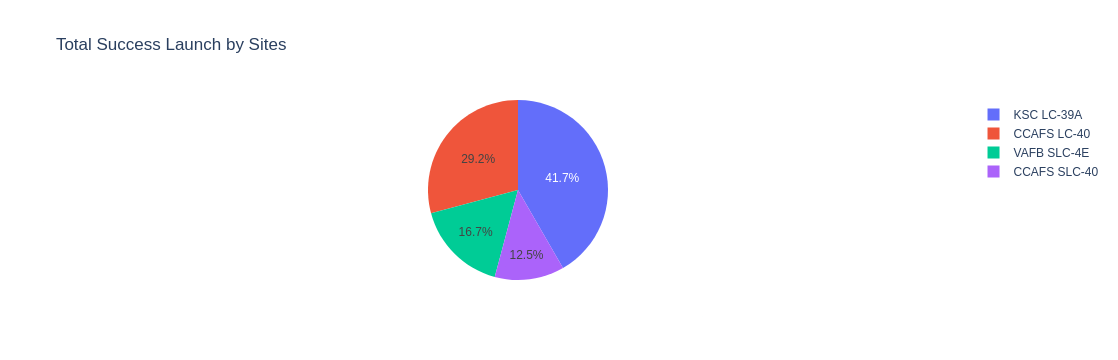

In [59]:
filtered_data=spacex_df.groupby('Launch Site')['class'].sum().to_frame()
site=filtered_data.index.to_list()
count=filtered_data['class'].to_list()
fig = px.pie(values=count, names=site, title='Total Success Launch by Sites')
fig.show()

In [83]:
spacex_df[spacex_df['Launch Site']=='VAFB SLC-4E']

,Unnamed: 0,Flight Number,Launch Site,class,Payload Mass (kg),Booster Version,Booster Version Category
26,26,6,VAFB SLC-4E,0,500.0,F9 v1.1 B1003,v1.1
27,27,21,VAFB SLC-4E,0,553.0,F9 v1.1 B1017,v1.1
28,28,29,VAFB SLC-4E,1,9600.0,F9 FT B1029.1,FT
29,29,37,VAFB SLC-4E,1,9600.0,F9 FT B1036.1,FT
30,30,40,VAFB SLC-4E,1,475.0,F9 FT B1038.1,FT
31,31,42,VAFB SLC-4E,1,9600.0,F9 B4 B1041.1,B4
32,32,46,VAFB SLC-4E,0,9600.0,F9 FT B1036.2,FT
33,33,49,VAFB SLC-4E,0,2150.0,F9 FT B1038.2,FT
34,34,51,VAFB SLC-4E,0,9600.0,F9 B4 B1041.2,B4
35,35,55,VAFB SLC-4E,0,6460.0,F9 B4 B1043.2,B4


In [84]:
filtered_data=spacex_df[spacex_df['Launch Site']=='VAFB SLC-4E'].groupby('class')['class'].count()
filtered_data
#label=filtered_data.index.to_list()
#count=filtered_data['class'].to_list()
#fig = px.pie(values=count, names=label, title='Total Success')
#fig.show()

class
0    6
1    4
Name: class, dtype: int64

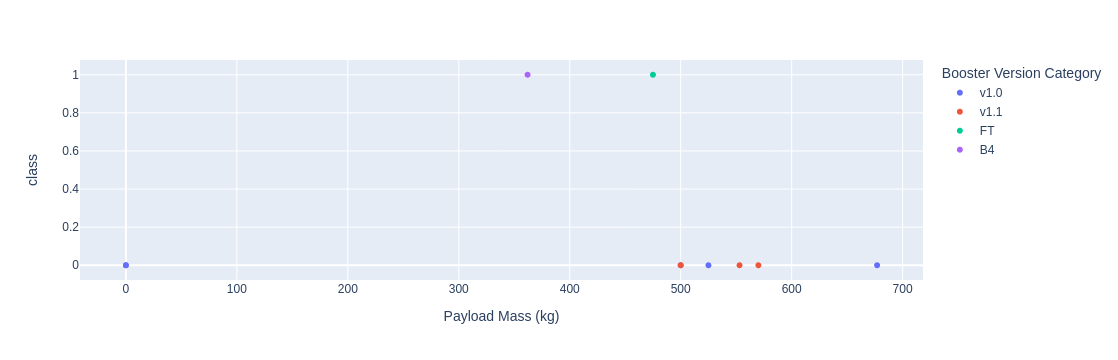

In [100]:
range=[0,1000]
filtered_data=spacex_df[spacex_df['Payload Mass (kg)'].between(range[0], range[1])]
fig= px.scatter(data_frame = filtered_data, x = 'Payload Mass (kg)' ,y = 'class' ,color = 'Booster Version Category')
fig.show()

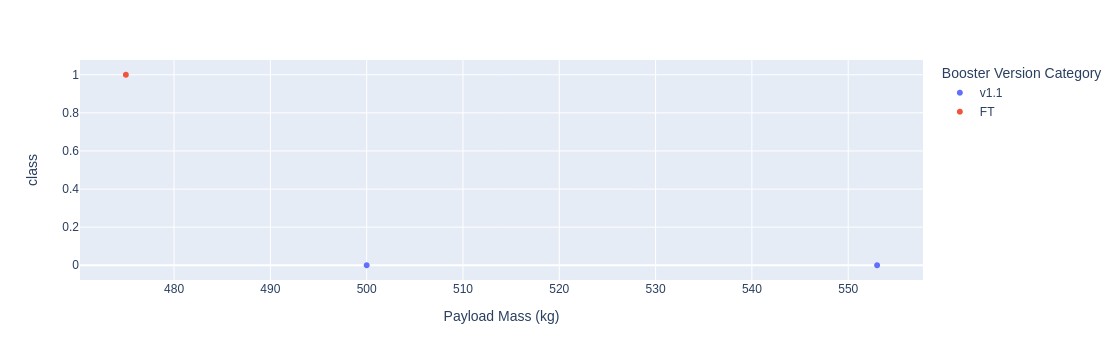

In [101]:
range=[0,1000]
filtered_data=spacex_df[(spacex_df['Launch Site']=='VAFB SLC-4E')&(spacex_df['Payload Mass (kg)'].between(range[0], range[1]))]
fig= px.scatter(data_frame = filtered_data, x = 'Payload Mass (kg)' ,y = 'class' ,color = 'Booster Version Category')
fig.show()

In [103]:
# Create a dash application
app = dash.Dash(__name__)

# Create an app layout
app.layout = html.Div(children=[html.H1('SpaceX Launch Records Dashboard',
                                        style={'textAlign': 'center', 'color': '#503D36',
                                               'font-size': 40}),
                                # TASK 1: Add a dropdown list to enable Launch Site selection
                                # The default select value is for ALL sites
                                # dcc.Dropdown(id='site-dropdown',...)
                                dcc.Dropdown(id='site-dropdown',
                                options=[
                                {'label': 'All Sites', 'value': 'ALL'},
                                {'label': 'CCAFS LC-40', 'value': 'CCAFS LC-40'},
                                {'label': 'VAFB SLC-4E', 'value': 'VAFB SLC-4E'},
                                {'label': 'KSC LC-39A', 'value': 'KSC LC-39A'},
                                {'label': 'CCAFS SLC-40', 'value': 'CCAFS SLC-40'},
                                ],
                                value='ALL',
                                placeholder="place holder here",
                                searchable=True
                                ),
                                html.Br(),

                                # TASK 2: Add a pie chart to show the total successful launches count for all sites
                                # If a specific launch site was selected, show the Success vs. Failed counts for the site
                                html.Div(dcc.Graph(id='success-pie-chart')),
                                html.Br(),

                                html.P("Payload range (Kg):"),
                                # TASK 3: Add a slider to select payload range
                                #dcc.RangeSlider(id='payload-slider',...)
                                dcc.RangeSlider(id='payload-slider',
                                min=0, max=10000, step=1000,
                                marks={0: '0',100: '100'},
                                value=[min_payload, max_payload]),
                                # TASK 4: Add a scatter chart to show the correlation between payload and launch success
                                html.Div(dcc.Graph(id='success-payload-scatter-chart')),
                                ])

# TASK 2:
# Add a callback function for `site-dropdown` as input, `success-pie-chart` as output

# Function decorator to specify function input and output
@app.callback(Output(component_id='success-pie-chart', component_property='figure'),
                  Input(component_id='site-dropdown', component_property='value'))
def get_pie_chart(entered_site):
    
    if entered_site == 'ALL':
        filtered_data=spacex_df.groupby('Launch Site')['class'].sum().to_frame()
        site=filtered_data.index.to_list()
        count=filtered_data['class'].to_list()
        fig = px.pie(values=count, names=site, title='Total Success Launch by Sites')
        return fig
    else:
        filtered_data=spacex_df[spacex_df['Launch Site']==entered_site].groupby('class')['class'].count().to_frame()
        label=filtered_data.index.to_list()
        count=filtered_data['class'].to_list()
        fig = px.pie(values=count, names=label, title='Total Success')
        return fig
        # return the outcomes piechart for a selected site


# TASK 4:
# Add a callback function for `site-dropdown` and `payload-slider` as inputs, `success-payload-scatter-chart` as output
@app.callback(Output(component_id='success-payload-scatter-chart', component_property='figure'),
[Input(component_id='site-dropdown', component_property='value'), Input(component_id="payload-slider", component_property="value")])
def get_scatter_chart(entered_site, range):
    
    if entered_site == 'ALL':
        filtered_data=spacex_df[spacex_df['Payload Mass (kg)'].between(range[0], range[1])]
        fig= px.scatter(data_frame = filtered_data, x = 'Payload Mass (kg)' ,y = 'class' ,color = 'Booster Version Category')
        return fig
    else:
        filtered_data=spacex_df[(spacex_df['Launch Site']==entered_site)&(spacex_df['Payload Mass (kg)'].between(range[0], range[1]))]
        fig= px.scatter(data_frame = filtered_data, x = 'Payload Mass (kg)' ,y = 'class' ,color = 'Booster Version Category')
        return fig

In [104]:
# Run the app
if __name__ == '__main__':
    app.run_server()